In [3]:
import pandas as pd

df = pd.read_csv('airlines_mean_scores.csv')
df.fillna(0, inplace=True)

In [5]:
print(df.describe())

       Mean Overall Rating  Mean Seat Comfort  Mean Cabin Staff Service  \
count           497.000000         497.000000                497.000000   
mean              3.357847           2.121429                  2.341227   
std               1.707569           1.046179                  1.164683   
min               0.910000           0.000000                  0.000000   
25%               2.100000           1.500000                  1.640000   
50%               3.070000           2.080000                  2.270000   
75%               4.210000           2.770000                  3.000000   
max               9.000000           5.000000                  5.000000   

       Mean Food & Beverages  Mean Inflight Entertainment  \
count              497.00000                   497.000000   
mean                 1.53008                     0.692314   
std                  1.13383                     0.807405   
min                  0.00000                     0.000000   
25%                

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import shapiro
import statsmodels.api as sm

In [9]:
data = df[['Mean Overall Rating','Mean Seat Comfort','Mean Cabin Staff Service', 'Mean Food & Beverages','Mean Inflight Entertainment','Mean Wifi & Connectivity','Mean Value For Money']]

In [11]:
correlation_matrix = data.corr()

print(correlation_matrix)

                             Mean Overall Rating  Mean Seat Comfort  \
Mean Overall Rating                     1.000000           0.390848   
Mean Seat Comfort                       0.390848           1.000000   
Mean Cabin Staff Service                0.385734           0.927442   
Mean Food & Beverages                   0.349429           0.744129   
Mean Inflight Entertainment             0.079946           0.350036   
Mean Wifi & Connectivity               -0.190082           0.199706   
Mean Value For Money                    0.591642           0.772880   

                             Mean Cabin Staff Service  Mean Food & Beverages  \
Mean Overall Rating                          0.385734               0.349429   
Mean Seat Comfort                            0.927442               0.744129   
Mean Cabin Staff Service                     1.000000               0.775054   
Mean Food & Beverages                        0.775054               1.000000   
Mean Inflight Entertainment    

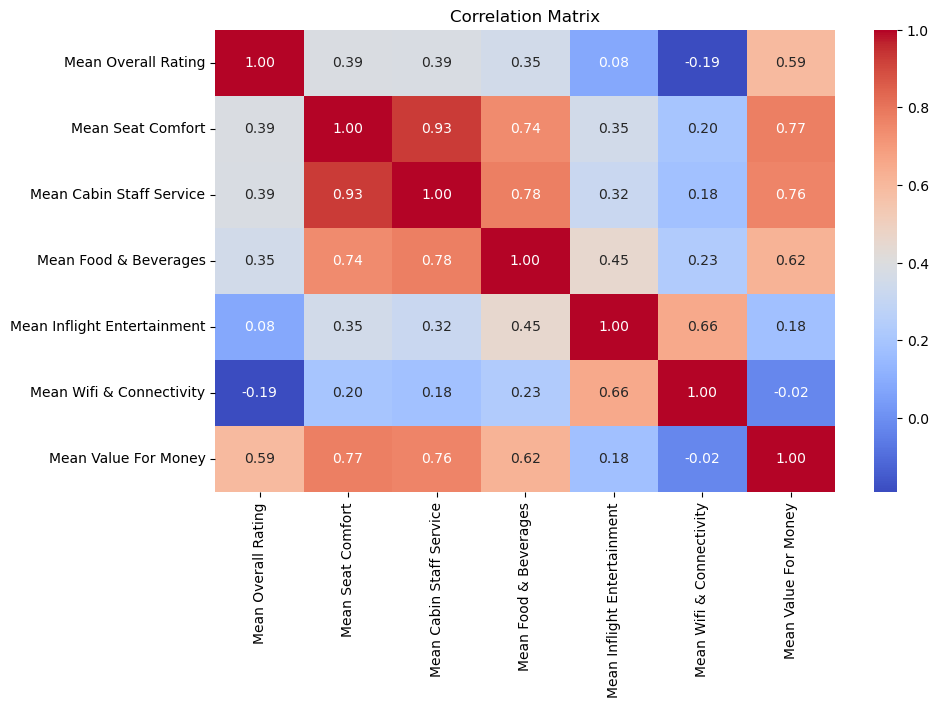

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [15]:
def calculate_p_values(data):
    p_values = np.ones((data.shape[1], data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(data.shape[1]):
            _, p_values[i, j] = stats.pearsonr(data.iloc[:, i], data.iloc[:, j])
    return pd.DataFrame(p_values, columns=data.columns, index=data.columns)

p_value_matrix = calculate_p_values(data)
print(p_value_matrix)

                             Mean Overall Rating  Mean Seat Comfort  \
Mean Overall Rating                 0.000000e+00       1.377122e-19   
Mean Seat Comfort                   1.377122e-19       0.000000e+00   
Mean Cabin Staff Service            4.439273e-19      1.377129e-213   
Mean Food & Beverages               1.017574e-15       9.079714e-89   
Mean Inflight Entertainment         7.497251e-02       9.012998e-16   
Mean Wifi & Connectivity            1.991254e-05       7.250650e-06   
Mean Value For Money                2.952607e-48      7.707917e-100   

                             Mean Cabin Staff Service  Mean Food & Beverages  \
Mean Overall Rating                      4.439273e-19           1.017574e-15   
Mean Seat Comfort                       1.377129e-213           9.079714e-89   
Mean Cabin Staff Service                 0.000000e+00          9.635668e-101   
Mean Food & Beverages                   9.635668e-101           0.000000e+00   
Mean Inflight Entertainment    

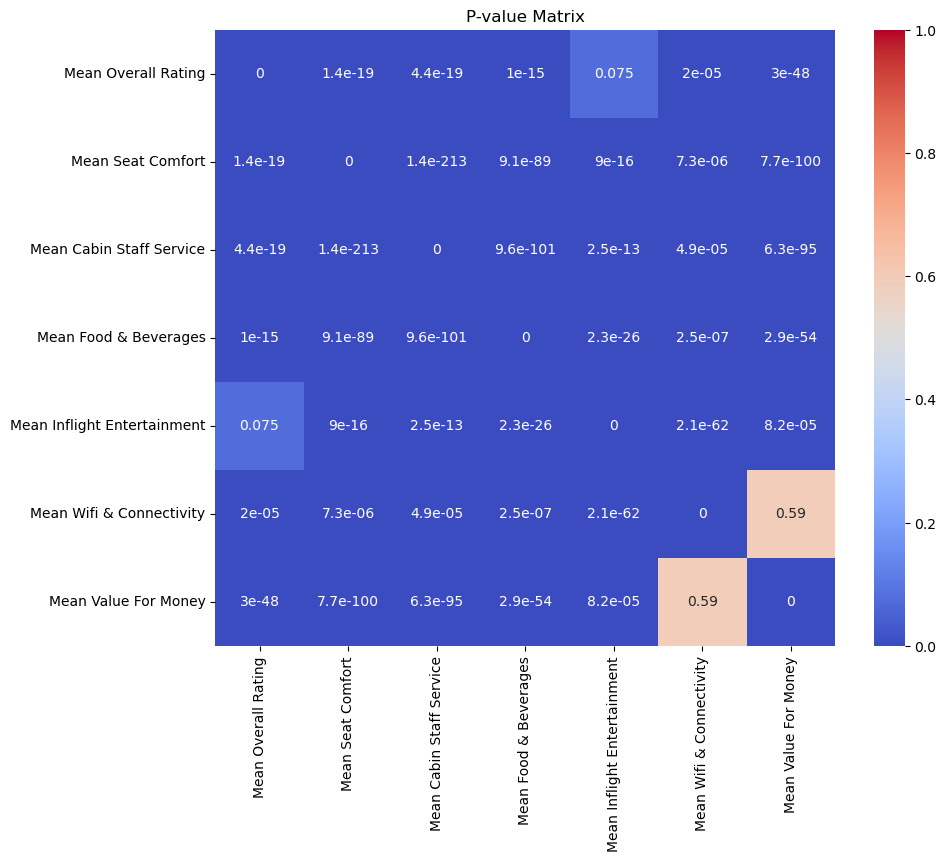

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1)
plt.title("P-value Matrix")
plt.show()

In [21]:
X = data['Mean Seat Comfort']
y = data['Mean Cabin Staff Service']

shapiro_test_stat, p_value = shapiro(y)

if p_value > 0.05:
    print("The data is normally distributed.")
else:
    print("The data is not normally distributed.")

The data is not normally distributed.


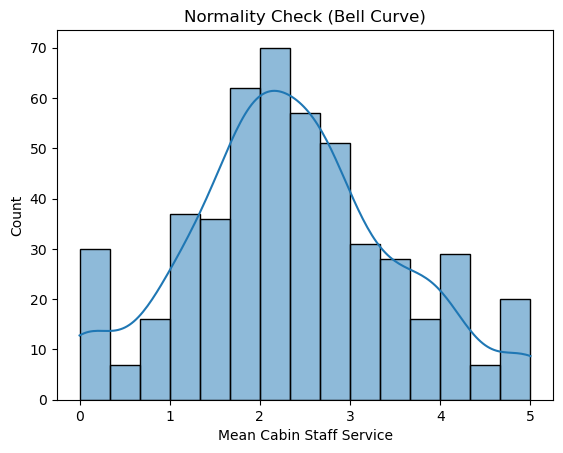

In [23]:
sns.histplot(y, kde=True)
plt.title("Normality Check (Bell Curve)")
plt.show()

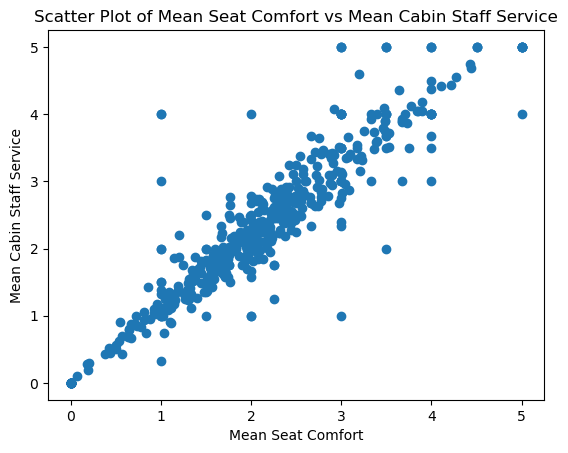

In [25]:
plt.scatter(data['Mean Seat Comfort'], data['Mean Cabin Staff Service'])
plt.title("Scatter Plot of Mean Seat Comfort vs Mean Cabin Staff Service")
plt.xlabel("Mean Seat Comfort")
plt.ylabel("Mean Cabin Staff Service")
plt.show()

In [27]:
X = data[['Mean Seat Comfort']]
y = data['Mean Cabin Staff Service']

X = sm.add_constant(X)

ols_model = sm.OLS(y, X).fit()

print(ols_model.summary())

                               OLS Regression Results                               
Dep. Variable:     Mean Cabin Staff Service   R-squared:                       0.860
Model:                                  OLS   Adj. R-squared:                  0.860
Method:                       Least Squares   F-statistic:                     3044.
Date:                      Mon, 27 Jan 2025   Prob (F-statistic):          1.38e-213
Time:                              21:58:19   Log-Likelihood:                -291.63
No. Observations:                       497   AIC:                             587.3
Df Residuals:                           495   BIC:                             595.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

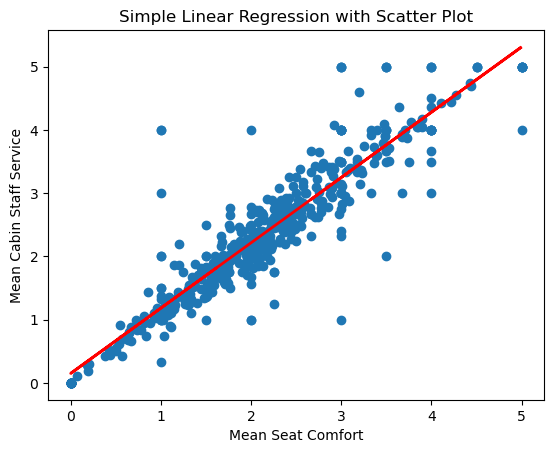

In [29]:
predictions = ols_model.predict(X)

plt.scatter(X['Mean Seat Comfort'], y)
plt.plot(X['Mean Seat Comfort'], predictions, color='red', linewidth=2)
plt.title("Simple Linear Regression with Scatter Plot")
plt.xlabel("Mean Seat Comfort")
plt.ylabel("Mean Cabin Staff Service")
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
X = data[['Mean Seat Comfort','Mean Wifi & Connectivity','Mean Value For Money']]
y = data['Mean Cabin Staff Service']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (397, 3) (397,)
Testing set shape: (100, 3) (100,)


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 0.044933829953086146
Coefficients: [0.91859984 0.04634569 0.13877295]


Mean Squared Error (MSE): 0.10862509138560203
R-squared (R²): 0.9080321480346472


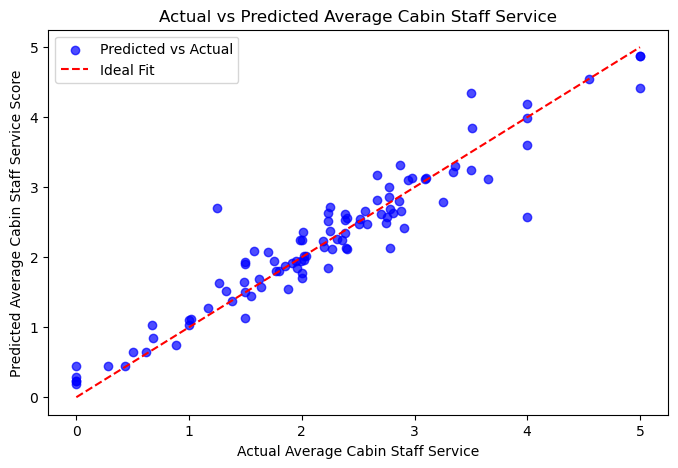

In [53]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Average Cabin Staff Service")
plt.ylabel("Predicted Average Cabin Staff Service Score")
plt.title("Actual vs Predicted Average Cabin Staff Service")
plt.legend()
plt.show()